In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten, AlphaDropout, Dropout
import keras.callbacks as callbacks;
import os
import random

In [294]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [295]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()

In [296]:
x_train = train[:, 1:]
x_train = x_train / 255.0

y_train = train[:, 0]

x_train.shape, y_train.shape

((112799, 784), (112799,))

In [297]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [298]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(416, activation="relu"),
    Dropout(rate=0.2),
    Dense(y_train_unique.size, activation="softmax")
])

In [299]:
model.summary(), model.input_shape

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 416)               326560    
                                                                 
 dropout (Dropout)           (None, 416)               0         
                                                                 
 dense_34 (Dense)            (None, 47)                19599     
                                                                 
Total params: 346,159
Trainable params: 346,159
Non-trainable params: 0
_________________________________________________________________


(None, (None, 784))

In [300]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(momentum=0.9), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [301]:
tensorboard_cb = callbacks.TensorBoard(run_logdir)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler_cb = callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
history = model.fit(x_train, y_train, epochs=100, validation_split=0.1, callbacks=[early_stopping_cb, lr_scheduler_cb, tensorboard_cb])

Epoch 1/100
3173/3173 [==============================] - 8s 2ms/step - loss: 1.1474 - sparse_categorical_accuracy: 0.6697 - val_loss: 0.7553 - val_sparse_categorical_accuracy: 0.7668 - lr: 0.0100
Epoch 2/100
3173/3173 [==============================] - 7s 2ms/step - loss: 0.7054 - sparse_categorical_accuracy: 0.7803 - val_loss: 0.5977 - val_sparse_categorical_accuracy: 0.8092 - lr: 0.0100
Epoch 3/100
3173/3173 [==============================] - 7s 2ms/step - loss: 0.6048 - sparse_categorical_accuracy: 0.8069 - val_loss: 0.5557 - val_sparse_categorical_accuracy: 0.8150 - lr: 0.0100
Epoch 4/100
3173/3173 [==============================] - 7s 2ms/step - loss: 0.5504 - sparse_categorical_accuracy: 0.8200 - val_loss: 0.5294 - val_sparse_categorical_accuracy: 0.8215 - lr: 0.0100
Epoch 5/100
3173/3173 [==============================] - 8s 2ms/step - loss: 0.5153 - sparse_categorical_accuracy: 0.8290 - val_loss: 0.5080 - val_sparse_categorical_accuracy: 0.8300 - lr: 0.0100
Epoch 6/100
3173/317

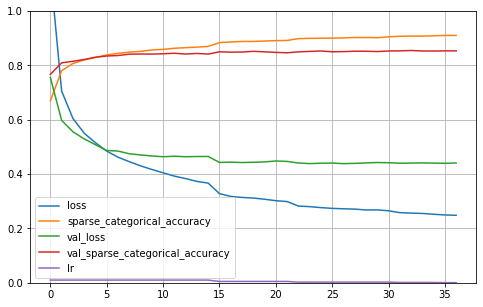

In [302]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [303]:
label_map = pd.read_csv("Datasets/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

In [304]:
def show_image(image):
    image = image.reshape(28,28)
    image = numpy.fliplr(image)
    image = numpy.rot90(image)

    plt.imshow(image, cmap="binary")
    plt.axis("off")
    plt.show()

def get_random_image_with_label():
    test_image = random.choice(test[:,:])
    x, label = test_image[1:], test_image[0]
    x = numpy.expand_dims(x, axis=0)
    return x, label

def predict_image(image):
    image = image / 255.0
    y_proba = model.predict(image)
    print(y_proba.round(2))
    return numpy.argmax(y_proba, axis=1)


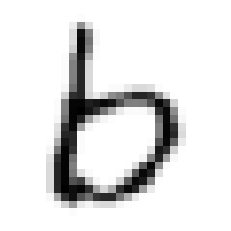

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Acutal label index: 37
Actual character: b
Predicted label index: 37
Predicted character: b


In [319]:
image, label = get_random_image_with_label()
show_image(image)
image_class = predict_image(image)
print("Acutal label index:", label)
print("Actual character:", label_dictionary[label])
print("Predicted label index:", image_class[0])
print("Predicted character:", label_dictionary[image_class[0]])

In [306]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 30988), started 14:34:34 ago. (Use '!kill 30988' to kill it.)